# 1. Importación del dataset
Se importa el dataset desde kaggle.

In [99]:
from google.colab import files
!pip install -q kaggle

In [100]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [101]:
!kaggle datasets download -d shree1992/housedata

housedata.zip: Skipping, found more recently modified local copy (use --force to force download)


In [102]:
!mv kaggle.json /root/.kaggle/kaggle.json

In [103]:
!kaggle datasets download -d shree1992/housedata

housedata.zip: Skipping, found more recently modified local copy (use --force to force download)


In [104]:
!unzip housedata.zip

Archive:  housedata.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data.csv                
replace data.dat? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data.dat                
replace output.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: output.csv              


In [165]:
import pandas as pd
house_data = pd.read_csv('data.csv')

# 2. Análisis exploratorio de los datos

## Exploración de los datos
Previamente a la visualización gráfica de los datos, debe realizarse una exploración de los mismos que nos permita comprenderlos.

Para ello, se inspecciona el dataset y se extraen características fundamentales del mismo como su tamaño (filas y columnas), el tipo de datos, el nombre de las columnas, la presencia de nulos.... 

In [166]:
print("Los 5 primeros registros del dataset:")
house_data.head()

Los 5 primeros registros del dataset:


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [167]:
nombre_columnas = (house_data.columns.tolist())
print("El nombre de las columnas:", nombre_columnas)

El nombre de las columnas: ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country']


In [168]:
significado_columnas = ['Fecha', 'Precio', 'Número habitaciones', 'Número baños', 'Área habitable (pies cuadrados)', 'Área total (pies cuadrados)', 'Plantas', 'Vistas al mar', 'Calidad vistas(0-4)', 'Estado vivienda(0-5)','Área superior (pies cuadrados)','Área sótano (pies cuadrados)','Año de construcción','Año de renovación','Calle','Ciudad','Código ZIP','País']
nombre_sign_col = dict(zip(nombre_columnas, significado_columnas))
print("El nombre de las columnas junto con sus ignificado:")
nombre_sign_col

El nombre de las columnas junto con sus ignificado:


{'bathrooms': 'Número baños',
 'bedrooms': 'Número habitaciones',
 'city': 'Ciudad',
 'condition': 'Estado vivienda(0-5)',
 'country': 'País',
 'date': 'Fecha',
 'floors': 'Plantas',
 'price': 'Precio',
 'sqft_above': 'Área superior (pies cuadrados)',
 'sqft_basement': 'Área sótano (pies cuadrados)',
 'sqft_living': 'Área habitable (pies cuadrados)',
 'sqft_lot': 'Área total (pies cuadrados)',
 'statezip': 'Código ZIP',
 'street': 'Calle',
 'view': 'Calidad vistas(0-4)',
 'waterfront': 'Vistas al mar',
 'yr_built': 'Año de construcción',
 'yr_renovated': 'Año de renovación'}

In [169]:
print("Algunos datos estadísticos del dataset")
house_data.describe().transpose()

Algunos datos estadísticos del dataset


,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [170]:
print("Se tienen", house_data.shape[0], "filas")
print("Se tienen", house_data.shape[1], "columnas")

Se tienen 4600 filas
Se tienen 18 columnas


In [171]:
print("El número de nulos por columna:")
house_data.isnull().sum()

El número de nulos por columna:


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

Con lo cual no va a ser necesario realizar un tratamiento de nulos.

In [172]:
print("El tipo de datos del dataset:")
house_data.dtypes

El tipo de datos del dataset:


date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

La gran mayoría son variables cuantitativas, bien de tipo entero, o bien de tipo decimal. Las variables cualitativas son de tipo objeto. 

## Visualización gráfica de los datos
Una vez explorados los datos se procede a visualizarlos gráficamente empleando matplotlib.pyplot y seaborn.

Se realizan histogramas, gráficos de dispersión... y lo que se representa gráficamente debe estar acorde con los datos estadísticos que se vieron previamente.

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fda1882bb90>,
      dtype=object)

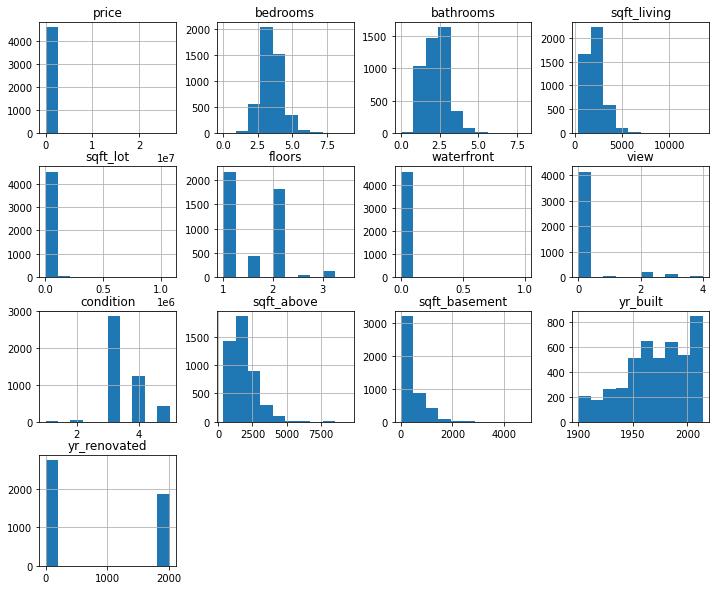

In [174]:
house_data.hist(figsize=[12,10])[0]

En general, estos histogramas no dan información interesante y son adecuados, sin embargo, el hecho de que existan valores extremos (se podrían considerar anómalos) dificulta trabajar con ciertas características o visualizarlas, como pueden ser el precio o el área total. Por ejemplo, el hecho de que exista una enorme diferencia entre el precio más bajo y el más alto (ver código abajo) va a derivar en que todos los datos "normales" aparezcan muy comprimidos o formando parte del mismo conjunto en la visualización (se puede ver en el histograma de precios) para que el gráfico (su eje), pueda incluir todos los datos. Esto se podría corregir quizá empleando una escala logarítmica o de otro tipo, pero podríamos perder comprensión de nuestros datos. Además, estos valores "anómalos", a priori van a perjudicar el entrenamiento del modelo, pues se va a centrar en ajustar bien estos valores, pues de no hacerlo se tendrían errores muy grandes debido a la magnitud de los mismos (Es como si estos puntos tuviesen más peso que el resto además de ser más "sospechosos").

In [175]:
precio_maximo = house_data['price'].max()
precio_minimo = house_data['price'].min()
print("El precio máximo es:", (precio_maximo))
print("El precio mínimo es:", precio_minimo)

El precio máximo es: 26590000.0
El precio mínimo es: 0.0


Precios tan alejados de la media no van a ayudar en la predicción del precio de la mayoría de viviendas, mientras que un precio nulo no puede ser más que un dato erróneo.
Para solucionar esto se va a crear una función que permite extraer los datos de ambos extremos, y al mismo tiempo almacenarlos por si fueran necesarios en un futuro.

Se va a utilizar como mínimo de precio 1 para descartar todos aquellos de cero, y se descarta también el 2% de precios más altos.

In [176]:
import numpy as np

In [177]:
def eliminar_anomalos(data,x):
  q98 = np.percentile(data[x],98)
  bajo, alto = 1, q98
  anomalos = data[(data[x]>alto) & (data[x]<bajo)]
  data     = data[(data[x]<alto) & (data[x]>bajo)]
  return data

In [178]:
house_data = eliminar_anomalos(house_data,'price')

Una vez aplicada la función ya se puede ver una distribución de precios mucho más relevante y significariva.

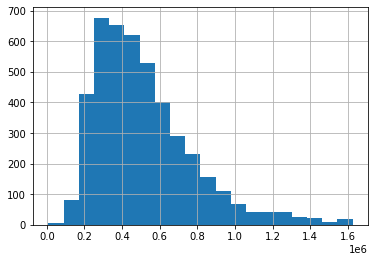

In [179]:
house_data['price'].hist(bins=20)

Se hace lo mismo para las áreas.

In [180]:
house_data = eliminar_anomalos(house_data,'sqft_lot')

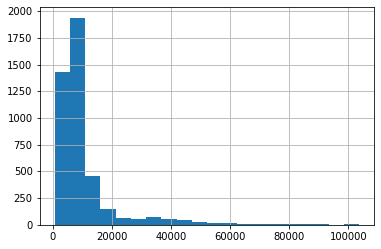

In [181]:
house_data['sqft_lot'].hist(bins=20)

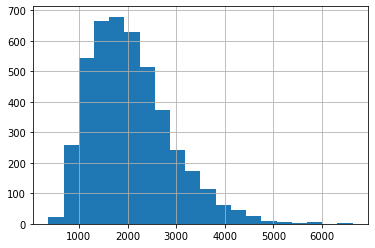

In [182]:
house_data['sqft_living'].hist(bins=20)

In [183]:
print('El tamaño del dataset una vez eliminados anómalos:',house_data.shape)

El tamaño del dataset una vez eliminados anómalos: (4369, 18)


En cuanto al año de renovación, no se podía extraer información de su histograma, ni de la función describe (mean:880), pues a las viviendas no renovadas se les asocia el año cero.
Se muestra un histograma solo con las viviendas renovadas:

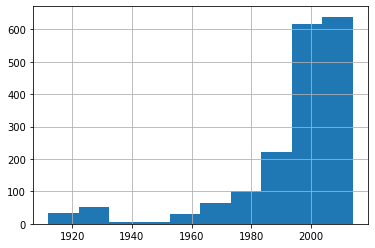

In [184]:
yr_renovated_yes = house_data[house_data['yr_renovated']!=0]['yr_renovated']
yr_renovated_yes.hist()

In [185]:
print('Se han renovado', yr_renovated_yes.size, 'viviendas.')

Se han renovado 1773 viviendas.


En cuánto a las vistas al mar:

In [186]:
house_data['waterfront'].value_counts()

0    4350
1      19
Name: waterfront, dtype: int64

In [187]:
house_data['bedrooms'].value_counts()

3.0    1975
4.0    1440
2.0     552
5.0     300
6.0      50
1.0      37
7.0      11
0.0       2
8.0       1
9.0       1
Name: bedrooms, dtype: int64

A todas luces no se tiene una muestra suficiente de casas con 7,8 y 0 habitaciones, por lo que incluírlas en el modelo podría traducirse en un sesgo en el coeficiente del modelo asociado a esa variable predictora.

In [188]:
house_data = house_data[(house_data['bedrooms'] > 0) & (house_data['bedrooms'] < 8)]

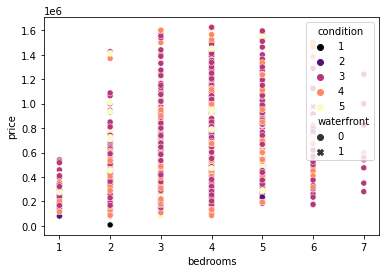

In [189]:
sns.scatterplot(x='bedrooms', y='price', data=house_data, hue='condition', style='waterfront', palette="magma")

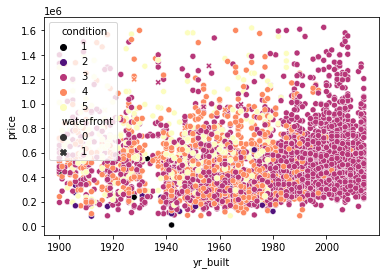

In [190]:
sns.scatterplot(x='yr_built', y='price', data=house_data, hue='condition', style='waterfront', palette="magma")

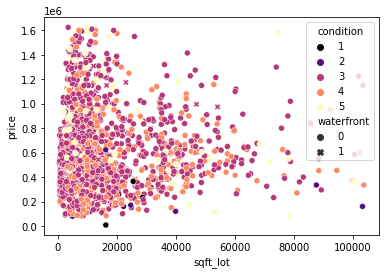

In [191]:
sns.scatterplot(x='sqft_lot', y='price', data=house_data, hue='condition', style='waterfront', palette="magma")

Queda patente que en este caso, es mucho más dificil que en el sprint previo predecir, a partir de la visualización gráfica la tendencia de la variable objetivo en función de una o unas pocas variables predictoras. Esto se puede comprobar a partir de la correlación entre variables:

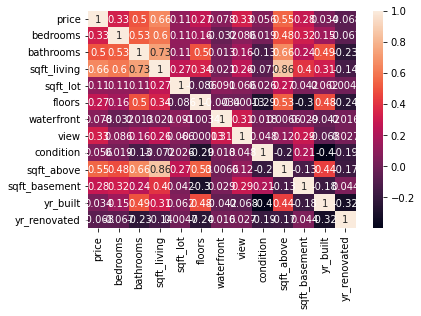

In [192]:
corr = house_data.corr()
sns.heatmap(corr, annot=True)

La variable objetivo ('price') está fuertemente correlacionada con muchas de las variables predictoras cuantitativas, y algunas para las que la correlación es débil, están sin embargo, fuertemente correlacionadas con aquellas otras. Y esto, es sin tener en cuenta las variables cualitativas. Está claro que para predecir el precio de la vivienda va a ser necesario un modelo complejo.

# 3. Fase de entrenamiento y validación
En estas dos fases se plantean una serie de hipótesis predictivas basadas en nuestra comprensión previa de los datos, se entrenan y posteriormente se evalúa su rendimiento según una o varias métricas, empleando en este caso el error cuadrático medio. 

El flujo de trabajo habitual es comenzar por una hipótesis lo más sencilla posible, como puede ser una regresión lineal simple y evaluar su rendimiento en función de la métrica o métricas que mejor se ajusten a nuestro problema. En caso de que el rendimiento del modelo no sea suficiente este se va refinando, considerando por ejemplo una regresión lineal múltiple o la también introducción de las variables cualitativas en el modelo.


## 1. Hipótesis Inicial: Regresión Lineal Simple
Así que, a pesar de lo comentado anteriormente se comenzará por una regresión lineal simple empleando como variable predictora la que está correlacionada más fuertemente con la objetivo, es decir "sqft_living".

In [193]:
X = house_data['sqft_living'].values
y = house_data['price'].values

In [194]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)

In [195]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
X_train = X_train.reshape(-1,1)
lin_reg.fit(X_train, y_train)

LinearRegression()

In [196]:
X_test       = X_test.reshape(-1,1)
y_pred       = lin_reg.predict(X_test)
y_pred_train = lin_reg.predict(X_train)

In [197]:
from sklearn.metrics import mean_squared_error
mse_hipot1_train = mean_squared_error(y_true = y_train, y_pred = y_pred_train)
mse_hipot1_test  = mean_squared_error(y_true = y_test, y_pred = y_pred)
print('Error cuadrático Medio (MSE) HIPO 1 TRAIN =' + str(mse_hipot1_train))
print('Error cuadrático Medio (MSE) HIPO 1 TEST =' + str(mse_hipot1_test))

Error cuadrático Medio (MSE) HIPO 1 TRAIN =39071667166.700676
Error cuadrático Medio (MSE) HIPO 1 TEST =37008011061.08332


El error cuadrático medio es inmenso, como cabía esperar, pues ya se ha comentado la necesidad de un modelo mucho más complejo.

## 2. Segunda hipótesis: Regresión lineal múltiple con variables cuantitativas
Visto el muy mal desempeño de la regresión lineal simple, se va a realizar una regresión múltiple, comenzando únicamente con variables cuantitativas, para posteriormente inlcuír las cualitativas previo análisis de las mismas. 

Puesto que nuestro dataset contiene muchas columnas es interesante comenzar viendo si es posible descartar alguna característica. Si nos fijamos en la correlación entre las mismas, se puede ver que "sqft_above" está fuertemente correlacionada con "sqft_living" como es lógico, y puede ser redundante, pues al tener "sqft_basement", "sqft_above" no dejará de ser la una menos la otra, y estará implícitamente en el dataset. Vamos a probar a descartar esta variable, y comparar el rendimiento para ver si esta es una buena estrategia a seguir en futuros datasets.  

In [198]:
cat_col = []
columns = house_data.columns.tolist()
for i in columns:
   if house_data[f'{i}'].dtypes == 'object':
    cat_col.append(i)
print ('Las columnas con variables categóricas son:',cat_col)
var_elim = cat_col.copy()
var_elim.append('price')
var_elim.append('sqft_above')
X2 = house_data.drop(var_elim,axis=1).values

Las columnas con variables categóricas son: ['date', 'street', 'city', 'statezip', 'country']


In [199]:
lin_reg2 = LinearRegression()
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=43)
lin_reg2.fit(X_train2, y_train2) 

LinearRegression()

In [200]:
y_pred2       = lin_reg2.predict(X_test2)
y_pred_train2 = lin_reg2.predict(X_train2) 

In [201]:
mse_hipot2_train = mean_squared_error(y_true = y_train2, y_pred = y_pred_train2)
mse_hipot2_test = mean_squared_error(y_true = y_test2, y_pred = y_pred2)
print('Error cuadrático Medio (MSE) HIPO 1 TRAIN =' + str(mse_hipot1_train))
print('Error cuadrático Medio (MSE) HIPO 1 TEST =' + str(mse_hipot1_test))
print('Error cuadrático Medio (MSE) HIPO 2 TRAIN =' + str(mse_hipot2_train))
print('Error cuadrático Medio (MSE) HIPO 2 TEST =' + str(mse_hipot2_test))

Error cuadrático Medio (MSE) HIPO 1 TRAIN =39071667166.700676
Error cuadrático Medio (MSE) HIPO 1 TEST =37008011061.08332
Error cuadrático Medio (MSE) HIPO 2 TRAIN =32671957201.10976
Error cuadrático Medio (MSE) HIPO 2 TEST =31279502092.748554


La mejora es considerable, pero seguimos con un error muy grande. Antes de pasar a las variables categóricas vamos a comparar el error con el que se tiene al si considerar "sqft_above".

In [202]:
var_elim.remove('sqft_above')
var_elim

['date', 'street', 'city', 'statezip', 'country', 'price']

In [203]:
X2 = house_data.drop(var_elim,axis=1).values
lin_reg2_above = LinearRegression()
X_train2_above, X_test2_above, y_train2_above, y_test2_above = train_test_split(X2, y, test_size=0.2, random_state=43)
lin_reg2_above.fit(X_train2_above, y_train2_above) 

LinearRegression()

In [204]:
y_pred2_above       = lin_reg2_above.predict(X_test2_above)
y_pred_train2_above = lin_reg2_above.predict(X_train2_above) 

In [205]:
mse_hipot2_train_above = mean_squared_error(y_true = y_train2_above, y_pred = y_pred_train2_above)
mse_hipot2_test = mean_squared_error(y_true = y_test2_above, y_pred = y_pred2_above)
print('Error cuadrático Medio (MSE) HIPO 1 TRAIN =' + str(mse_hipot1_train))
print('Error cuadrático Medio (MSE) HIPO 1 TEST =' + str(mse_hipot1_test))
print('Error cuadrático Medio (MSE) HIPO 2 TRAIN =' + str(mse_hipot2_train))
print('Error cuadrático Medio (MSE) HIPO 2 TEST =' + str(mse_hipot2_test))
print('Error cuadrático Medio (MSE) HIPO 2 TRAIN(w/ "sqft_above") =' + str(mse_hipot2_train))
print('Error cuadrático Medio (MSE) HIPO 2 TEST(w/ "sqft_above") =' + str(mse_hipot2_test))

Error cuadrático Medio (MSE) HIPO 1 TRAIN =39071667166.700676
Error cuadrático Medio (MSE) HIPO 1 TEST =37008011061.08332
Error cuadrático Medio (MSE) HIPO 2 TRAIN =32671957201.10976
Error cuadrático Medio (MSE) HIPO 2 TEST =31279502092.74482
Error cuadrático Medio (MSE) HIPO 2 TRAIN(w/ "sqft_above") =32671957201.10976
Error cuadrático Medio (MSE) HIPO 2 TEST(w/ "sqft_above") =31279502092.74482


**El error es el mismo** empleando la variable "sqft_above" que sin emplearla, por lo que vamos a seguir trabajando sin ella. 

## 3. Tercera Hipótesis: Regresión lineal múltiple con variables cualitativas.
Vamos ahora a considerar las variables categóricas, pero para ello previamente debemos realizar un análisis de las mismas. Esto quizá se pudo incluir en en al apartado de análisis exploratorio, pero considero que queda más compacto aquí. 

In [206]:
print ('Las columnas con variables categóricas son:',cat_col)

Las columnas con variables categóricas son: ['date', 'street', 'city', 'statezip', 'country']


Vamos a ver como es posible descartar varias de ellas:

In [207]:
house_data['country'].value_counts()

USA    4365
Name: country, dtype: int64

Para la variable **"Country"** únicamente se tiene como salida USA, por lo que no aporta ninguna información a nuestro modelo y se va a descartar.

In [208]:
house_data['date'].unique()

array(['2014-05-02 00:00:00', '2014-05-03 00:00:00',
       '2014-05-04 00:00:00', '2014-05-05 00:00:00',
       '2014-05-06 00:00:00', '2014-05-07 00:00:00',
       '2014-05-08 00:00:00', '2014-05-09 00:00:00',
       '2014-05-10 00:00:00', '2014-05-11 00:00:00',
       '2014-05-12 00:00:00', '2014-05-13 00:00:00',
       '2014-05-14 00:00:00', '2014-05-15 00:00:00',
       '2014-05-16 00:00:00', '2014-05-17 00:00:00',
       '2014-05-18 00:00:00', '2014-05-19 00:00:00',
       '2014-05-20 00:00:00', '2014-05-21 00:00:00',
       '2014-05-22 00:00:00', '2014-05-23 00:00:00',
       '2014-05-24 00:00:00', '2014-05-25 00:00:00',
       '2014-05-26 00:00:00', '2014-05-27 00:00:00',
       '2014-05-28 00:00:00', '2014-05-29 00:00:00',
       '2014-05-30 00:00:00', '2014-05-31 00:00:00',
       '2014-06-01 00:00:00', '2014-06-02 00:00:00',
       '2014-06-03 00:00:00', '2014-06-04 00:00:00',
       '2014-06-05 00:00:00', '2014-06-06 00:00:00',
       '2014-06-07 00:00:00', '2014-06-08 00:0

**"Date"** tampoco proporciona información relevante para el modelo, pues las fechas de venta (suponemos, aunque podría ser fecha de registro en el dataset) son muy próximas y por tanto irrelevantes. Si sería interesante si abarcasen un mayor periodo de tiempo, suficiente para incluir fluctuaciones en el mercado.

**"Statezip"** es bastante redundante con "City" y "Street" por lo que tampoco se va a incluir. Vamos a analizar estas dos últimas.

In [209]:
house_data['street'].value_counts()

2520 Mulberry Walk NE    4
2500 Mulberry Walk NE    3
615 NW 92nd St           2
Indian Trail             2
5968 44th Ave S          2
                        ..
1833 220th Pl NE         1
759 Ilwaco Pl NE         1
6444 Carleton Ave S      1
13232 5th Ave SW         1
1223 269th Ave SE        1
Name: street, Length: 4292, dtype: int64

No se tiene una muestra suficiente para cada calle, y se tienen 4292 calles distintas, por lo que trabajar con esta variable no es posible.

In [210]:
house_data['city'].value_counts()

Seattle                1528
Renton                  284
Bellevue                264
Redmond                 221
Kirkland                184
Kent                    180
Issaquah                177
Sammamish               167
Auburn                  165
Federal Way             145
Shoreline               120
Woodinville             104
Maple Valley             92
Burien                   71
Snoqualmie               67
Mercer Island            66
Kenmore                  64
Des Moines               58
North Bend               47
Covington                41
Duvall                   36
Lake Forest Park         34
Newcastle                33
Bothell                  33
SeaTac                   28
Tukwila                  28
Vashon                   23
Enumclaw                 20
Normandy Park            17
Carnation                17
Black Diamond             8
Fall City                 7
Clyde Hill                7
Pacific                   6
Algona                    5
Ravensdale          

Puesto que se tiene una gran cantidad de ciudades, y cada una de ellas generaría una columna, vamos a quedarnos con las que aparecen más frecuentemente, para mejorar en términos de eficiencia (generando menos columnas a analizar, podría ser fundamental en un dataset muy grande) y de predicción (considerar calles que solo aparecen una vez no ayuda al modelo). A las casas situadas en ciudades minoritarias se les asignará como ciudad "other_city". Se va a emplear como umbral 30 apariciones. 

In [211]:
ciudades = house_data.groupby('city').count()[['price']].rename(columns={'price':'times'})
ciudades_cambiar = ciudades[ciudades['times']<30].index.tolist()
ciudades_cambiar

['Algona',
 'Beaux Arts Village',
 'Black Diamond',
 'Carnation',
 'Clyde Hill',
 'Enumclaw',
 'Fall City',
 'Inglewood-Finn Hill',
 'Medina',
 'Milton',
 'Normandy Park',
 'Pacific',
 'Preston',
 'Ravensdale',
 'SeaTac',
 'Skykomish',
 'Snoqualmie Pass',
 'Tukwila',
 'Vashon',
 'Yarrow Point']

In [212]:
house_data['city'] = house_data['city'].replace(ciudades_cambiar,"Other_city")
house_data['city'].value_counts()

Seattle             1528
Renton               284
Bellevue             264
Redmond              221
Kirkland             184
Other_city           184
Kent                 180
Issaquah             177
Sammamish            167
Auburn               165
Federal Way          145
Shoreline            120
Woodinville          104
Maple Valley          92
Burien                71
Snoqualmie            67
Mercer Island         66
Kenmore               64
Des Moines            58
North Bend            47
Covington             41
Duvall                36
Lake Forest Park      34
Bothell               33
Newcastle             33
Name: city, dtype: int64

In [213]:
house_data_hipot3 = pd.get_dummies(data=house_data, prefix='city', columns=['city'])
house_data_hipot3 = house_data_hipot3.drop(['country', 'statezip','street','date'], axis=1)
house_data_hipot3.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city_Auburn,city_Bellevue,city_Bothell,city_Burien,city_Covington,city_Des Moines,city_Duvall,city_Federal Way,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Lake Forest Park,city_Maple Valley,city_Mercer Island,city_Newcastle,city_North Bend,city_Other_city,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Shoreline,city_Snoqualmie,city_Woodinville
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [214]:
X3 = house_data_hipot3.drop('price', axis=1).values
y3 = house_data_hipot3['price']
lin_reg3 = LinearRegression()
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=43)
lin_reg3.fit(X_train3, y_train3) 

LinearRegression()

In [215]:
y_pred3       = lin_reg3.predict(X_test3)
y_pred_train3 = lin_reg3.predict(X_train3) 

In [216]:
mse_hipot3_train = mean_squared_error(y_true = y_train3, y_pred = y_pred_train3)
mse_hipot3_test  = mean_squared_error(y_true = y_test3, y_pred = y_pred3)
print('Error cuadrático Medio (MSE) HIPO 1 TRAIN =' + str(mse_hipot1_train))
print('Error cuadrático Medio (MSE) HIPO 1 TEST =' + str(mse_hipot1_test))
print('Error cuadrático Medio (MSE) HIPO 2 TRAIN =' + str(mse_hipot2_train))
print('Error cuadrático Medio (MSE) HIPO 2 TEST =' + str(mse_hipot2_test))
print('Error cuadrático Medio (MSE) HIPO 2 TRAIN(w/ cat) =' + str(mse_hipot3_train))
print('Error cuadrático Medio (MSE) HIPO 2 TEST(w/ cat) =' + str(mse_hipot3_test))

Error cuadrático Medio (MSE) HIPO 1 TRAIN =39071667166.700676
Error cuadrático Medio (MSE) HIPO 1 TEST =37008011061.08332
Error cuadrático Medio (MSE) HIPO 2 TRAIN =32671957201.10976
Error cuadrático Medio (MSE) HIPO 2 TEST =31279502092.74482
Error cuadrático Medio (MSE) HIPO 2 TRAIN(w/ cat) =20836977010.53552
Error cuadrático Medio (MSE) HIPO 2 TEST(w/ cat) =22389855809.391975


**La mejora es enorme** al haber introducido la variable "city", por lo que vamos a continuar trabajando con este modelo y pasamos a la tercera hipótesis en la que se va a incluir el escalado.


## Cuarta Hipótesis: Regresión lineal múltiple con escalado.
El hecho de que la propia variable objetivo ('price') sea superior en varios órdenes de magnitud a las demás nos invita a escalarla para que esto no afecte al entrenamiento del modelo. Se comienza escalando únicamente esta, pero es apreciable que hay importantes diferencias entre las variables predictoras en su orden de magnitud. Por lo demás se sigue la misma metodología que en el apartado anterior.


In [217]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X4 = X3
y4 = scaler.fit_transform(y3.to_numpy().reshape(-1,1))
y4 = y4.reshape(1,-1)[0]
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=43)
lin_reg4 = LinearRegression() 
lin_reg4.fit(X_train4, y_train4)

LinearRegression()

In [218]:
y_pred4       = lin_reg4.predict(X_test4)
y_pred_train4 = lin_reg4.predict(X_train4)

In [219]:
mse_hipot4_train = mean_squared_error(y_true = y_train4, y_pred = y_pred_train4)
mse_hipot4_test = mean_squared_error(y_true = y_test4, y_pred = y_pred4)
print('Error cuadrático Medio (MSE) HIPO 1 TRAIN =' + str(mse_hipot1_train))
print('Error cuadrático Medio (MSE) HIPO 1 TEST =' + str(mse_hipot1_test))
print('Error cuadrático Medio (MSE) HIPO 2 TRAIN =' + str(mse_hipot2_train))
print('Error cuadrático Medio (MSE) HIPO 2 TEST =' + str(mse_hipot2_test))
print('Error cuadrático Medio (MSE) HIPO 3 TRAIN =' + str(mse_hipot3_train))
print('Error cuadrático Medio (MSE) HIPO 3 TEST =' + str(mse_hipot3_test))
print('Error cuadrático Medio (MSE) HIPO 4 TRAIN =' + str(mse_hipot4_train))
print('Error cuadrático Medio (MSE) HIPO 4 TEST =' + str(mse_hipot4_test))

Error cuadrático Medio (MSE) HIPO 1 TRAIN =39071667166.700676
Error cuadrático Medio (MSE) HIPO 1 TEST =37008011061.08332
Error cuadrático Medio (MSE) HIPO 2 TRAIN =32671957201.10976
Error cuadrático Medio (MSE) HIPO 2 TEST =31279502092.74482
Error cuadrático Medio (MSE) HIPO 3 TRAIN =20836977010.53552
Error cuadrático Medio (MSE) HIPO 3 TEST =22389855809.391975
Error cuadrático Medio (MSE) HIPO 4 TRAIN =0.30748648231395964
Error cuadrático Medio (MSE) HIPO 4 TEST =0.3303975149703034


El modelo ha mejorado sustancialmente, pero todavía necesita hacerlo más. No podemos dejarnos llevar por pensar que el error es pequeño al ser de 0.3, pues al haber escalado la variable objetivo el rango de esta es mucho más pequeño:

In [220]:
print(y4.max())
print(y4.min())

4.273249631886307
-1.939150583520872


Se procede pues a escalar también las variables predictoras, algunas de ellas muy grandes como los áreas.

In [221]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X4_sc = scaler.fit_transform(X3)
y4 = scaler.fit_transform(y3.to_numpy().reshape(-1,1))
y4 = y4.reshape(1,-1)[0]
X_train4_sc, X_test4_sc, y_train4, y_test4 = train_test_split(X4_sc, y4, test_size=0.2, random_state=43)
lin_reg4_sc = LinearRegression() 
lin_reg4_sc.fit(X_train4_sc, y_train4)

LinearRegression()

In [222]:
y_pred4_sc       = lin_reg4_sc.predict(X_test4_sc)
y_pred_train4_sc = lin_reg4_sc.predict(X_train4_sc)

In [223]:
mse_hipot4_train_sc = mean_squared_error(y_true = y_train4, y_pred = y_pred_train4_sc)
mse_hipot4_test_sc = mean_squared_error(y_true = y_test4, y_pred = y_pred4_sc)
print('Error cuadrático Medio (MSE) HIPO 1 TRAIN =' + str(mse_hipot1_train))
print('Error cuadrático Medio (MSE) HIPO 1 TEST =' + str(mse_hipot1_test))
print('Error cuadrático Medio (MSE) HIPO 2 TRAIN =' + str(mse_hipot2_train))
print('Error cuadrático Medio (MSE) HIPO 2 TEST =' + str(mse_hipot2_test))
print('Error cuadrático Medio (MSE) HIPO 3 TRAIN =' + str(mse_hipot3_train))
print('Error cuadrático Medio (MSE) HIPO 3 TEST =' + str(mse_hipot3_test))
print('Error cuadrático Medio (MSE) HIPO 4 TRAIN =' + str(mse_hipot4_train))
print('Error cuadrático Medio (MSE) HIPO 4 TEST =' + str(mse_hipot4_test))
print('Error cuadrático Medio (MSE) HIPO 4 TRAIN(w/ scaler) =' + str(mse_hipot4_train_sc))
print('Error cuadrático Medio (MSE) HIPO 4 TEST(w/ scaler) =' + str(mse_hipot4_test_sc))

Error cuadrático Medio (MSE) HIPO 1 TRAIN =39071667166.700676
Error cuadrático Medio (MSE) HIPO 1 TEST =37008011061.08332
Error cuadrático Medio (MSE) HIPO 2 TRAIN =32671957201.10976
Error cuadrático Medio (MSE) HIPO 2 TEST =31279502092.74482
Error cuadrático Medio (MSE) HIPO 3 TRAIN =20836977010.53552
Error cuadrático Medio (MSE) HIPO 3 TEST =22389855809.391975
Error cuadrático Medio (MSE) HIPO 4 TRAIN =0.30748648231395964
Error cuadrático Medio (MSE) HIPO 4 TEST =0.3303975149703034
Error cuadrático Medio (MSE) HIPO 4 TRAIN(w/ scaler) =0.30808116750749126
Error cuadrático Medio (MSE) HIPO 4 TEST(w/ scaler) =0.33003214408289167


Esto no se traduce en una mejoría en la métrica, se ha probado también con otros "scalers" y el rendimiento ha sido peor.


 